In [20]:
%load_ext autoreload
%autoreload 2

from libsvm.svmutil import *
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
with open('./abalone.data', 'r') as file:
    input_data_str = file.read()
    file.close()

In [4]:
input_data_list = input_data_str.split('\n')[:-1]

for i, point in enumerate(input_data_list):
    new_point = point.replace('M', '1')
    new_point = new_point.replace('F', '-1')
    new_point = new_point.replace('I', '0')
    input_data_list[i] = new_point

for i, point in enumerate(input_data_list):
    point_list = point.split(',')
    point_list = [float(j) for j in point_list]
    input_data_list[i] = point_list

In [5]:
for i, input_line in enumerate(input_data_list):
    age = input_line[-1]
    input_line = input_line[:-1]
    for j in range(len(input_line)):
        input_line[j] = str(j+1)+':'+str(input_line[j])
    if(age<10):
        label = '-1'
    else:
        label = '+1'
    input_line.insert(0,label)
    input_data_list[i] = input_line

for i, input_line in enumerate(input_data_list):
    input_line = ' '.join(input_line)
    input_data_list[i] = input_line

In [6]:
format_data_str = '\n'.join(input_data_list)

In [7]:
with open('./abalone','w+') as file:
    file.write(format_data_str)
    file.close()

In [2]:
ytr, xtr = svm_read_problem('abalone.train', return_scipy=True)

In [3]:
scale_param = csr_find_scale_param(xtr, lower=0)

In [4]:
scaled_xtr = csr_scale(xtr, scale_param)

       > new      #nonzeros 24082
If feature values are non-negative and sparse, get scale_param by setting lower=0 rather than the default lower=-1.


In [5]:
yts, xts = svm_read_problem('abalone.test', return_scipy=True)

In [6]:
scaled_xts = csr_scale(xts, scale_param)

       > new      #nonzeros 8018
If feature values are non-negative and sparse, get scale_param by setting lower=0 rather than the default lower=-1.


In [15]:
k_list = [0, 1, 2, 3]
C_list = [pow(3,-3), pow(3,-2), pow(3,-1), pow(3,0), pow(3,1), pow(3,2), pow(3,3)]
d_list = [1, 2, 3, 4, 5]

In [9]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)

In [16]:
model_dict = {}
for d in d_list:
    model_dict[d] = {}
    for C in C_list:
        model_dict[d][C] = {}
        fold = 0
        for train_idx, val_idx in kf.split(X=scaled_xtr, y=ytr):
            fold += 1
            prob  = svm_problem(ytr[train_idx], scaled_xtr[train_idx])
            param = svm_parameter('-t 1 -d ' + str(d) + ' -c ' + str(C))
            model = svm_train(prob, param)
            model_dict[d][C][fold] = model

.
*
optimization finished, #iter = 1164
nu = 0.916821
obj = -74.936915, rho = 1.447683
nSV = 2298, nBSV = 2296
Total nSV = 2298
.
*
optimization finished, #iter = 1163
nu = 0.912513
obj = -74.979308, rho = 1.462816
nSV = 2288, nBSV = 2286
Total nSV = 2288
.
*
optimization finished, #iter = 1156
nu = 0.909466
obj = -74.598996, rho = 1.480615
nSV = 2280, nBSV = 2277
Total nSV = 2280
.
*
optimization finished, #iter = 1155
nu = 0.907858
obj = -74.550832, rho = 1.463130
nSV = 2276, nBSV = 2276
Total nSV = 2276
.
*
optimization finished, #iter = 1161
nu = 0.911832
obj = -74.676988, rho = 1.455023
nSV = 2286, nBSV = 2284
Total nSV = 2286
.
*
optimization finished, #iter = 1035
nu = 0.777828
obj = -196.542141, rho = 1.972728
nSV = 1950, nBSV = 1948
Total nSV = 1950
.
*
optimization finished, #iter = 1045
nu = 0.780164
obj = -197.511948, rho = 1.937277
nSV = 1956, nBSV = 1954
Total nSV = 1956
.
*
optimization finished, #iter = 1026
nu = 0.775849
obj = -196.430507, rho = 1.996423
nSV = 1946, nB

*
optimization finished, #iter = 925
nu = 0.627367
obj = -4503.214393, rho = 1.695300
nSV = 1575, nBSV = 1572
Total nSV = 1575
*
optimization finished, #iter = 925
nu = 0.628349
obj = -4517.626921, rho = 1.688138
nSV = 1577, nBSV = 1574
Total nSV = 1577
*
optimization finished, #iter = 943
nu = 0.600214
obj = -12859.548973, rho = 1.651135
nSV = 1508, nBSV = 1501
Total nSV = 1508
*
optimization finished, #iter = 942
nu = 0.602208
obj = -12869.680511, rho = 1.546727
nSV = 1512, nBSV = 1507
Total nSV = 1512
*
optimization finished, #iter = 922
nu = 0.599040
obj = -12865.806590, rho = 1.668974
nSV = 1504, nBSV = 1496
Total nSV = 1504
*
optimization finished, #iter = 993
nu = 0.596616
obj = -12788.093922, rho = 1.675859
nSV = 1499, nBSV = 1493
Total nSV = 1499
*
optimization finished, #iter = 948
nu = 0.599479
obj = -12855.108951, rho = 1.676276
nSV = 1508, nBSV = 1500
Total nSV = 1508
.
*
optimization finished, #iter = 1189
nu = 0.563283
obj = -36444.094509, rho = 1.522699
nSV = 1416, nBSV

.
*
optimization finished, #iter = 1201
nu = 0.948125
obj = -723.979420, rho = 1.009699
nSV = 2376, nBSV = 2376
Total nSV = 2376
.
*
optimization finished, #iter = 1176
nu = 0.925868
obj = -712.968996, rho = 1.016403
nSV = 2322, nBSV = 2320
Total nSV = 2322
.
*
optimization finished, #iter = 1184
nu = 0.929705
obj = -711.068193, rho = 1.015747
nSV = 2330, nBSV = 2328
Total nSV = 2330
.
*
optimization finished, #iter = 1182
nu = 0.930358
obj = -714.121418, rho = 1.013550
nSV = 2334, nBSV = 2332
Total nSV = 2334
.
*
optimization finished, #iter = 1188
nu = 0.934421
obj = -718.370623, rho = 1.013519
nSV = 2344, nBSV = 2342
Total nSV = 2344
.
*
optimization finished, #iter = 1100
nu = 0.853152
obj = -1950.526322, rho = 1.038749
nSV = 2138, nBSV = 2138
Total nSV = 2138
.
*
optimization finished, #iter = 1092
nu = 0.842450
obj = -1937.649979, rho = 1.045474
nSV = 2114, nBSV = 2110
Total nSV = 2114
.
*
optimization finished, #iter = 1094
nu = 0.839471
obj = -1919.677467, rho = 1.047654
nSV = 

.
*
optimization finished, #iter = 1025
nu = 0.770029
obj = -16283.489942, rho = 1.035501
nSV = 1932, nBSV = 1930
Total nSV = 1932
*
optimization finished, #iter = 989
nu = 0.712152
obj = -45692.054496, rho = 1.063533
nSV = 1787, nBSV = 1783
Total nSV = 1787
*
optimization finished, #iter = 982
nu = 0.711768
obj = -45683.695401, rho = 1.064474
nSV = 1784, nBSV = 1781
Total nSV = 1784
*
optimization finished, #iter = 984
nu = 0.701788
obj = -45085.425543, rho = 1.070590
nSV = 1760, nBSV = 1757
Total nSV = 1760
*
optimization finished, #iter = 984
nu = 0.709115
obj = -45574.596009, rho = 1.068180
nSV = 1779, nBSV = 1776
Total nSV = 1779
*
optimization finished, #iter = 985
nu = 0.711861
obj = -45743.578186, rho = 1.067008
nSV = 1786, nBSV = 1782
Total nSV = 1786


In [23]:
def cross_val_error(d, C, model_dict, yts, scaled_xts):
    err = []
    for fold in range(1,6):
        m = model_dict[d][C][fold]
        p_label, p_acc, p_val = svm_predict(yts, scaled_xts, m)
        err.append(1-p_acc[0])
    mean = sum(err) / len(err)
    variance = sum([((x - mean) ** 2) for x in err]) / len(err)
    std = variance ** 0.5
    return mean, std

Accuracy = 71.9349% (751/1044) (classification)
Accuracy = 71.0728% (742/1044) (classification)
Accuracy = 71.7433% (749/1044) (classification)
Accuracy = 71.5517% (747/1044) (classification)
Accuracy = 71.5517% (747/1044) (classification)
Accuracy = 72.2222% (754/1044) (classification)
Accuracy = 71.7433% (749/1044) (classification)
Accuracy = 71.8391% (750/1044) (classification)
Accuracy = 72.1264% (753/1044) (classification)
Accuracy = 72.5096% (757/1044) (classification)
Accuracy = 72.6054% (758/1044) (classification)
Accuracy = 72.4138% (756/1044) (classification)
Accuracy = 72.318% (755/1044) (classification)
Accuracy = 72.6054% (758/1044) (classification)
Accuracy = 72.6054% (758/1044) (classification)
Accuracy = 73.9464% (772/1044) (classification)
Accuracy = 74.0421% (773/1044) (classification)
Accuracy = 73.9464% (772/1044) (classification)
Accuracy = 73.8506% (771/1044) (classification)
Accuracy = 73.9464% (772/1044) (classification)
Accuracy = 75.1916% (785/1044) (classific

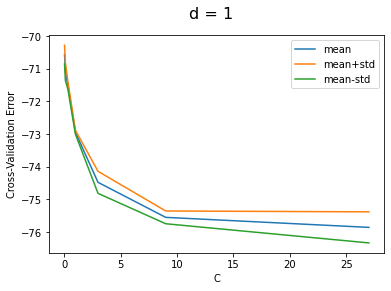

Accuracy = 62.069% (648/1044) (classification)
Accuracy = 58.6207% (612/1044) (classification)
Accuracy = 59.8659% (625/1044) (classification)
Accuracy = 60.3448% (630/1044) (classification)
Accuracy = 60.3448% (630/1044) (classification)
Accuracy = 70.4023% (735/1044) (classification)
Accuracy = 69.3487% (724/1044) (classification)
Accuracy = 69.3487% (724/1044) (classification)
Accuracy = 69.636% (727/1044) (classification)
Accuracy = 70.1149% (732/1044) (classification)
Accuracy = 71.2644% (744/1044) (classification)
Accuracy = 71.5517% (747/1044) (classification)
Accuracy = 71.1686% (743/1044) (classification)
Accuracy = 71.1686% (743/1044) (classification)
Accuracy = 71.6475% (748/1044) (classification)
Accuracy = 72.6054% (758/1044) (classification)
Accuracy = 72.5096% (757/1044) (classification)
Accuracy = 72.4138% (756/1044) (classification)
Accuracy = 72.4138% (756/1044) (classification)
Accuracy = 72.6054% (758/1044) (classification)
Accuracy = 73.3716% (766/1044) (classifica

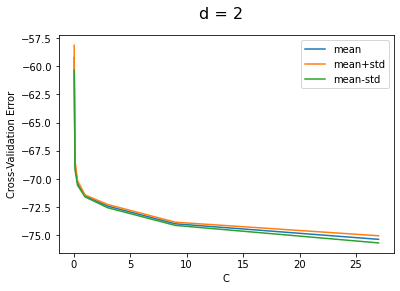

Accuracy = 66.2835% (692/1044) (classification)
Accuracy = 48.0843% (502/1044) (classification)
Accuracy = 48.3716% (505/1044) (classification)
Accuracy = 48.3716% (505/1044) (classification)
Accuracy = 48.4674% (506/1044) (classification)
Accuracy = 58.8123% (614/1044) (classification)
Accuracy = 57.2797% (598/1044) (classification)
Accuracy = 58.4291% (610/1044) (classification)
Accuracy = 57.8544% (604/1044) (classification)
Accuracy = 58.2375% (608/1044) (classification)
Accuracy = 65.4215% (683/1044) (classification)
Accuracy = 65.1341% (680/1044) (classification)
Accuracy = 64.5594% (674/1044) (classification)
Accuracy = 64.8467% (677/1044) (classification)
Accuracy = 64.8467% (677/1044) (classification)
Accuracy = 70.5939% (737/1044) (classification)
Accuracy = 69.9234% (730/1044) (classification)
Accuracy = 69.9234% (730/1044) (classification)
Accuracy = 70.1149% (732/1044) (classification)
Accuracy = 70.2107% (733/1044) (classification)
Accuracy = 71.6475% (748/1044) (classifi

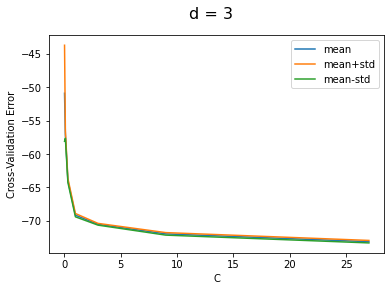

Accuracy = 52.2989% (546/1044) (classification)
Accuracy = 47.7011% (498/1044) (classification)
Accuracy = 47.7011% (498/1044) (classification)
Accuracy = 47.7011% (498/1044) (classification)
Accuracy = 47.7011% (498/1044) (classification)
Accuracy = 51.8199% (541/1044) (classification)
Accuracy = 49.4253% (516/1044) (classification)
Accuracy = 49.6169% (518/1044) (classification)
Accuracy = 49.5211% (517/1044) (classification)
Accuracy = 49.6169% (518/1044) (classification)
Accuracy = 57.6628% (602/1044) (classification)
Accuracy = 56.705% (592/1044) (classification)
Accuracy = 57.1839% (597/1044) (classification)
Accuracy = 56.705% (592/1044) (classification)
Accuracy = 56.705% (592/1044) (classification)
Accuracy = 63.5057% (663/1044) (classification)
Accuracy = 62.7395% (655/1044) (classification)
Accuracy = 62.931% (657/1044) (classification)
Accuracy = 63.3142% (661/1044) (classification)
Accuracy = 63.2184% (660/1044) (classification)
Accuracy = 67.433% (704/1044) (classificatio

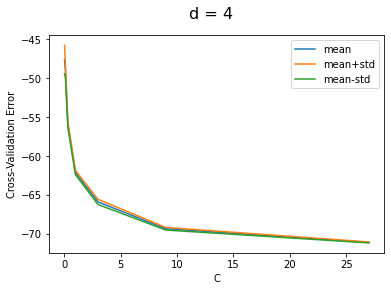

Accuracy = 52.2989% (546/1044) (classification)
Accuracy = 47.7011% (498/1044) (classification)
Accuracy = 47.7011% (498/1044) (classification)
Accuracy = 47.7011% (498/1044) (classification)
Accuracy = 47.7011% (498/1044) (classification)
Accuracy = 52.2989% (546/1044) (classification)
Accuracy = 47.7969% (499/1044) (classification)
Accuracy = 47.7969% (499/1044) (classification)
Accuracy = 47.7969% (499/1044) (classification)
Accuracy = 47.7969% (499/1044) (classification)
Accuracy = 50.5747% (528/1044) (classification)
Accuracy = 50% (522/1044) (classification)
Accuracy = 50.1916% (524/1044) (classification)
Accuracy = 50.1916% (524/1044) (classification)
Accuracy = 50.1916% (524/1044) (classification)
Accuracy = 56.8008% (593/1044) (classification)
Accuracy = 56.0345% (585/1044) (classification)
Accuracy = 56.3218% (588/1044) (classification)
Accuracy = 56.2261% (587/1044) (classification)
Accuracy = 56.3218% (588/1044) (classification)
Accuracy = 61.4943% (642/1044) (classificatio

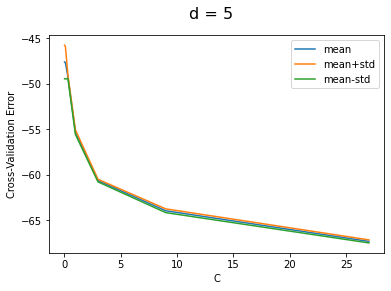

In [25]:
fig_dict = {}
for d in d_list:
    fig = plt.figure()
    fig.suptitle('d = '+str(d), fontsize=16)
    fig_x = C_list
    fig_y, fig_yu, fig_yl = [], [], []
    for C in C_list:
        mean, std = cross_val_error(d, C, model_dict, yts, scaled_xts)
        fig_y.append(mean)
        fig_yu.append(mean+std)
        fig_yl.append(mean-std)
    plt.plot(fig_x, fig_y, label='mean')
    plt.plot(fig_x, fig_yu, label='mean+std')
    plt.plot(fig_x, fig_yl, label='mean-std')
    plt.xlabel('C')
    plt.ylabel('Cross-Validation Error')
    plt.legend()
    plt.show()